# Introduction

Prophet is an automatic time series analysis tool written by Facebook. This is just to demonstrate how to use it, and as an exploratory analysis of some historic stocks. For the stocks we use January 1st 2010 to 2020, by day. Then we extract just the opening value.

https://facebook.github.io/prophet/docs/quick_start.html

In [1]:
import alpaca_trade_api as tradeapi
import pandas as pd

start = '2019-05-01T00:00:00.000Z' #Actually pulls barset data starting at next day.
end = '2020-07-23T00:00:00.000Z'

api = tradeapi.REST('PKJM62G0UIEAA3T1DIHA',
                    '08PcErcQBQMmMFLPafd2zeVel6DeBkAyhEUpKHFe',
                    base_url='https://paper-api.alpaca.markets')
apple = api.get_barset(symbols='AAPL',
                       start=start,
                       end=end,
                       timeframe='day')
time = api.get_calendar(start=start,end=end)

apple = apple['AAPL'] #It's a dictionary that can handle many of tickers.
time = time
time = [str(i.date) for i in time] #this just extracts the string of the date.

opening = [bar.o for index, bar in enumerate(apple)]
df = pd.DataFrame({'ds':time,'y':opening}) # Prophet takes a dataframe with ds for dates and y for value.

Lets implement prophet. I decided to put more comments in than walking through it. I felt lazy.

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


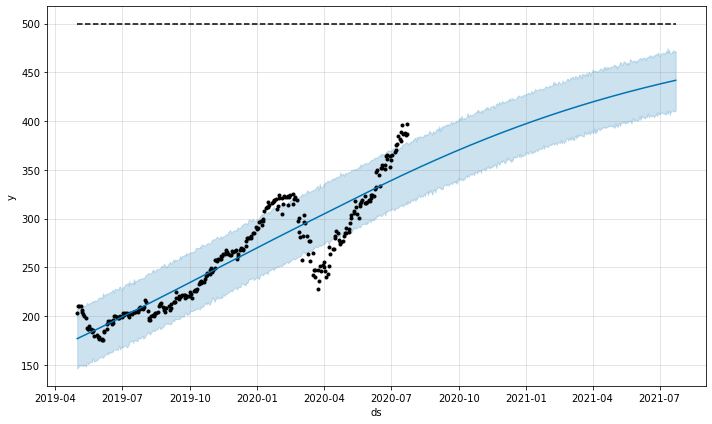

In [2]:
import pandas as pd
from fbprophet import Prophet
import numpy as np

cap = 500

df['cap'] = cap
#df['reg'] = np.random.normal(size=df.shape[0],) #you can add an extra regressor if you want.

m = Prophet(growth='logistic',  # use linear or logistic depending on the growth, logistic is prefered
            daily_seasonality=False,
            yearly_seasonality=False,
            weekly_seasonality=False) #daily, yearly, and weekly, find the trends on that scale. I want the
                                      #average trend line for the whole thing.

#m.add_regressor('reg') #this is how you add an extra regressor.
m.fit(df)
future = m.make_future_dataframe(periods=365) #make a dataframe with times of the future
future['cap'] = cap #market cap
#future['reg'] = np.random.normal(size=future.shape[0]) #extra regressor
forecast = m.predict(future)
fig1 = m.plot(forecast)